In [1]:
# count number of measurements in latitude bands

In [2]:
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300  # high res plots
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [3]:
# import necessary packages
import matplotlib.pyplot as plt # plots
import cartopy.crs as ccrs      # map projections
import pandas as pd             # large arrays
import numpy as np              # large arrays and matrices
import xarray as xr             # major tool to work with NetCDF data!
import re
# custom color map downloaded from GEOS-Chem python tutorial
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable

In [4]:
# first and last day for counting
first_day = '2016-01-01'
last_day_p1 = '2019-01-01'
# latitude bins
lat_res = 5    # horizontal resolution of lat

In [5]:
# file names and paths
input_file = '/geos/u73/msadiq/satellite/oco-2/OCO2_b91_10sec_GOOD_r24.nc4'

In [6]:
ds = xr.open_dataset(input_file, engine='netcdf4')
ds #['warn_level']

<xarray.Dataset>
Dimensions:                       (epoch_dimension: 7, levels: 20, sounding_id: 1319634)
Coordinates:
  * sounding_id                   (sounding_id) int64 20140906020721 ... 20190731225946
Dimensions without coordinates: epoch_dimension, levels
Data variables:
    test_flag                     (sounding_id) int8 ...
    latitude                      (sounding_id) float32 ...
    longitude                     (sounding_id) float32 ...
    data_type                     (sounding_id) int8 ...
    date                          (sounding_id, epoch_dimension) int16 ...
    time                          (sounding_id) datetime64[ns] ...
    solar_zenith_angle            (sounding_id) float32 ...
    solar_azimuth_angle           (sounding_id) float32 ...
    sensor_zenith_angle           (sounding_id) float32 ...
    sensor_azimuth_angle          (sounding_id) float32 ...
    psurf_apriori_b8              (sounding_id) float32 ...
    psurf_apriori_o2a             (sounding_id) float32 ...
    psurf_apriori_wco2            (sounding_id) float32 ...
    psurf_apriori_sco2            (sounding_id) float32 ...
    psurf_apriori                 (sounding_id) float32 ...
    psurf                         (sounding_id) float32 ...
    xco2_raw                      (sounding_id) float32 ...
    xco2_apriori                  (sounding_id) float32 ...
    xco2                          (sounding_id) float32 ...
    xco2_uncertainty              (sounding_id) float32 ...
    model_error                   (sounding_id) float32 ...
    co2_profile_apriori           (sounding_id, levels) float32 ...
    xco2_averaging_kernel         (sounding_id, levels) float32 ...
    pressure_weight               (sounding_id, levels) float32 ...
    sigma_levels                  (levels) float32 ...
    xco2_quality_flag             (sounding_id) int8 ...
    warn_level                    (sounding_id) int8 ...
    land_fraction                 (sounding_id) int8 ...
    altitude                      (sounding_id) float32 ...
    airmass                       (sounding_id) float32 ...
    path                          (sounding_id) int16 ...
    operation_mode                (sounding_id) int8 ...
    land_water_indicator          (sounding_id) int8 ...
    surface_type                  (sounding_id) int8 ...
    fs                            (sounding_id) float32 ...
    delta_windspeed               (sounding_id) float32 ...
    s31                           (sounding_id) float32 ...
    s32                           (sounding_id) float32 ...
    albedo_3                      (sounding_id) float32 ...
    albedo_slope_3                (sounding_id) float32 ...
    aod_total                     (sounding_id) float32 ...
    albedo_2                      (sounding_id) float32 ...
    co2_grad_del                  (sounding_id) float32 ...
    dws                           (sounding_id) float32 ...
    dpfrac                        (sounding_id) float32 ...
    dp_o2a                        (sounding_id) float32 ...
    dp                            (sounding_id) float32 ...
    dp_abp                        (sounding_id) float32 ...
    co2_ratio                     (sounding_id) float32 ...
    h2o_ratio                     (sounding_id) float32 ...
    xco2_weak_idp                 (sounding_id) float32 ...
    xco2_strong_idp               (sounding_id) float32 ...
    tcwv_apriori                  (sounding_id) float32 ...
    tcwv                          (sounding_id) float32 ...
    ice_height                    (sounding_id) float32 ...
    h2o_scale                     (sounding_id) float32 ...
    deltaT                        (sounding_id) float32 ...
    snr_o2a                       (sounding_id) float32 ...
    snr_wco2                      (sounding_id) float32 ...
    snr_sco2                      (sounding_id) float32 ...
    altitude_stddev               (sounding_id) float32 ...
    N_total_shots                 (sounding_id

In [7]:
# convert time input to match the format of sound_id
first_day_digital = re.sub("[^0-9]", "", first_day)
last_day_p1_digital = re.sub("[^0-9]", "", last_day_p1)
begin = int(first_day_digital + '000000')  # begin and end of time slice we want to look at
end = int(last_day_p1_digital + '000000')  # OCO-2 format
print('begining sound id of extraction: ' + str(begin))
print('end: ' + str(end))

begining sound id of extraction: 20160101000000
end: 20190101000000


In [8]:
# get a slice of data within begin and end time
ds_slice = ds.sel(sounding_id=slice(begin,end)) # xarray Dataset

In [9]:
lon_series = ds_slice['longitude']              # lon and lat position, 1d
lat_series = ds_slice['latitude']
sound_id   = ds_slice['sounding_id']            # sound id, 1d
land_frac  = ds_slice['land_fraction']
mode =       ds_slice['operation_mode']
quality =    ds_slice['xco2_quality_flag']

lat = np.linspace(-90, 90, int(180/lat_res + 1)) # grid center
lat

array([-90., -85., -80., -75., -70., -65., -60., -55., -50., -45., -40.,
       -35., -30., -25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,
        20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,  70.,
        75.,  80.,  85.,  90.])

In [10]:
# position dataframe, used in for loops to locate
df_position = pd.DataFrame({'sound_id': sound_id, 
                            'lon': lon_series, 
                            'lat': lat_series,
                            'mode': mode,
                            'land_frac': land_frac,
                            'quality': quality})
len(df_position) #.head()

862162

In [11]:
count = np.zeros(len(lat)) # store counts here
count_land = np.zeros(len(lat))
count_nadir = np.zeros(len(lat)) # store counts of nadir measurements
count_glint  = np.zeros(len(lat)) # store land measurements
count_glint_land = np.zeros(len(lat))

for ilat in range(len(lat)):
    df_quality = df_position.loc[df_position['quality'] == 0] # good quality data
    
    df_lat_slice = df_quality[df_quality['lat'].between(lat[ilat]-0.5*lat_res,lat[ilat]+0.5*lat_res, inclusive = True)]
    count[ilat] = len(df_lat_slice)

    df_land = df_lat_slice.loc[df_lat_slice['land_frac'] == 100]
    count_land[ilat] = len(df_land)
    
    df_nadir = df_lat_slice.loc[df_lat_slice['mode'] == 0]
    count_nadir[ilat] = len(df_nadir)
    
    df_glint = df_lat_slice.loc[df_lat_slice['mode'] == 1]
    count_glint[ilat] = len(df_glint)
    
    df_land_glint = df_glint.loc[df_glint['land_frac'] == 100]
    count_glint_land[ilat] = len(df_land_glint)


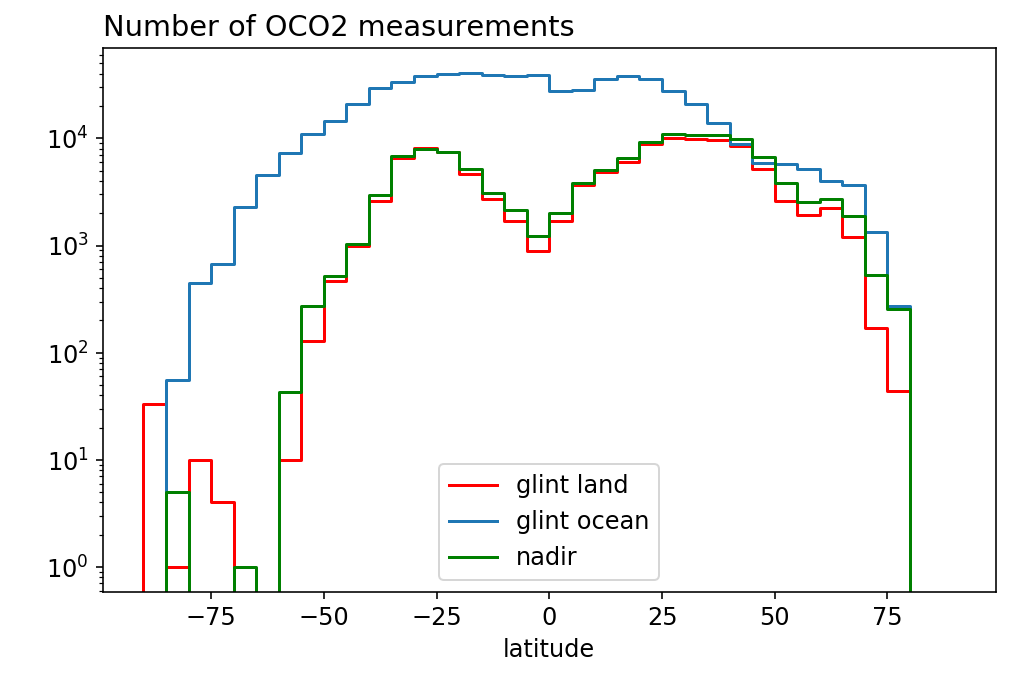

In [12]:
fig = plt.figure(figsize=[8,5])

plt.plot(lat, count_glint_land, linestyle='-', c='r', drawstyle='steps', label = 'glint land')
plt.plot(lat, count_glint - count_glint_land, linestyle='-', drawstyle='steps', label = 'glint ocean')
plt.plot(lat, count_nadir, linestyle='-', c='g', drawstyle='steps', label = 'nadir')
plt.yscale('log')

plt.title('Number of OCO2 measurements', loc = 'left')
plt.ylabel(' ')
plt.xlabel('latitude')
plt.legend()

fig.savefig('/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data/count_oco2.png', dpi=300)
